In [160]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [162]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [163]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [164]:
deliveries=pd.read_csv('/content/gdrive/My Drive/deliveries.csv')

In [165]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [166]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [167]:
matches=pd.read_csv('/content/gdrive/My Drive/matches.csv',index_col='id',parse_dates=['date'])

In [168]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [169]:
matches.head(1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [170]:
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [171]:
matches[matches['result']=='no result']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [172]:
winlost=matches[['team1','team2','winner','toss_winner']]
winlost.head(5)

,team1,team2,winner,toss_winner
id,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Rising Pune Supergiant
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore


In [173]:
winlost['loser']=winlost.apply(lambda x:(x['team1'] if x['team2'] == x['winner'] else x['team2']),axis=1)
winlost['toss_loser']=winlost.apply(lambda x:(x['team1'] if x['team2'] == x['toss_winner'] else x['team2']),axis=1)

In [174]:
winlost.head()

,team1,team2,winner,toss_winner,loser,toss_loser
id,,,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant,Rising Pune Supergiant
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils


In [175]:
winlost[winlost['winner']=='Royal Challengers Bangalore']['loser'].value_counts().iplot(kind='bar',title='Royal Challengers Wins against Opponents')

In [176]:
winners=winlost['winner'].value_counts()
losers=winlost['loser'].value_counts()

In [177]:
winners.iplot(kind='bar',yTitle='no of matches won',xTitle='Team',title='Number of Matches won by Teams in IPL until 2017')

In [178]:
losers.iplot(kind='bar',yTitle='no of matches lost',xTitle='Team',title='Number of Matches lost by Teams in IPL until 2017')

In [179]:
winwhentosswin=winlost[winlost['winner']==winlost['toss_winner']]
winwhentosslose=winlost[winlost['winner']==winlost['toss_loser']]

In [180]:
rcbwinwhentosswin=winwhentosswin[winwhentosswin['winner']=='Royal Challengers Bangalore']['loser'].value_counts()
rcblosewhentosslose=winwhentosslose[winwhentosslose['winner']=='Royal Challengers Bangalore']['loser'].value_counts()

In [181]:
rcblosewhentosslose

Kings XI Punjab            7
Mumbai Indians             6
Delhi Daredevils           5
Chennai Super Kings        5
Pune Warriors              4
Sunrisers Hyderabad        4
Deccan Chargers            3
Kochi Tuskers Kerala       2
Gujarat Lions              2
Kolkata Knight Riders      2
Rajasthan Royals           2
Rising Pune Supergiants    1
Name: loser, dtype: int64

In [182]:
import plotly.express as px
plt.figure()
px.pie(names=rcbwinwhentosswin.index,values=rcbwinwhentosswin.values,title='% of games won by RCB against other teams when they win tosses')

<Figure size 432x288 with 0 Axes>

In [183]:
px.pie(names=rcblosewhentosslose.index,values=rcblosewhentosslose.values,title='% of games lost by RCB against other teams when they lose tosses')

In [184]:
mom=matches['player_of_match'].value_counts()

In [185]:
mom[:20].iplot(kind='bar',title='Top 20 Motm',yTitle='count',xTitle='player')

In [186]:
city=matches['city'].value_counts()

In [187]:
city[:20].iplot(kind='bar',title='cities played in',yTitle='count',xTitle='cities')

In [188]:
stadium=matches['venue'].value_counts()

In [189]:
stadium[:20].iplot(kind='bar',title='stadiums played in',yTitle='count',xTitle='stadiums')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [190]:
matches['venue'].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [191]:
matches[(matches['venue']=='Eden Gardens')&(matches['winner']=='Kolkata Knight Riders')]['winner'].count()

45

In [192]:
rcbwinban=matches[(matches['venue']=='M Chinnaswamy Stadium')|(matches['venue']=='M. Chinnaswamy Stadium')&(matches['winner']=='Royal Challengers Bangalore')]['winner'].count()
rcbloseban=matches[(matches['venue']=='M Chinnaswamy Stadium')|(matches['venue']=='M. Chinnaswamy Stadium')&(matches['winner']!='Royal Challengers Bangalore')]['winner'].count()
miwinmum=matches[(matches['venue']=='Wankhede Stadium')&(matches['winner']=='Mumbai Indians')]['winner'].count()
milossmum=matches[(matches['venue']=='Wankhede Stadium')&(matches['winner']!='Mumbai Indians')]['winner'].count()
cskwinchen=matches[((matches['venue']=='MA Chidambaram Stadium, Chepauk')|(matches['venue']=='M. A. Chidambaram Stadium'))&(matches['winner']=='Chennai Super Kings')]['winner'].count()
csklosschen=matches[((matches['venue']=='MA Chidambaram Stadium, Chepauk')|(matches['venue']=='M. A. Chidambaram Stadium'))&(matches['winner']!='Chennai Super Kings')]['winner'].count()
kkrwinkol=matches[(matches['venue']=='Eden Gardens')&(matches['winner']=='Kolkata Knight Riders')]['winner'].count()
kkrlosskol=matches[(matches['venue']=='Eden Gardens')&(matches['winner']!='Kolkata Knight Riders')]['winner'].count()

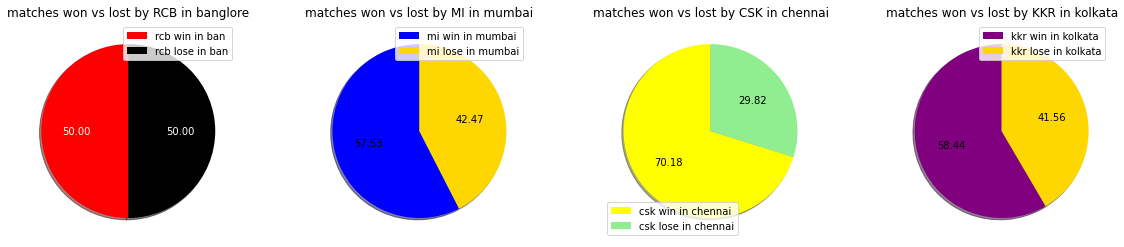

In [193]:
fig,[ax1,ax2,ax3,ax4]=plt.subplots(1,4,figsize=(20,4))
A=['rcb win in ban','rcb lose in ban']
B=[rcbwinban,rcbloseban]
patches,texts,autotexts=ax1.pie(B,autopct='%.2f',shadow=True,startangle=90,colors=['red','black'])
plt.setp(autotexts,size=10,color='white')
ax1.legend(A,loc='best')
ax1.set_title('matches won vs lost by RCB in banglore')
A=['mi win in mumbai','mi lose in mumbai']
B=[miwinmum,milossmum]
ax2.pie(B,autopct='%.2f',shadow=True,startangle=90,colors=['blue','gold'])
ax2.legend(A,loc='best')
ax2.set_title('matches won vs lost by MI in mumbai')
A=['csk win in chennai','csk lose in chennai']
B=[cskwinchen,csklosschen]
ax3.pie(B,autopct='%.2f',shadow=True,startangle=90,colors=['yellow','lightgreen'])
ax3.legend(A,loc='best')
ax3.set_title('matches won vs lost by CSK in chennai')
A=['kkr win in kolkata','kkr lose in kolkata']
B=[kkrwinkol,kkrlosskol]
ax4.pie(B,autopct='%.2f',shadow=True,startangle=90,colors=['purple','gold'])
ax4.legend(A,loc='best')
ax4.set_title('matches won vs lost by KKR in kolkata')
plt.show()

#RCB VS SRH H2H

In [194]:
rcbh2hsrh=winlost[((winlost['team1']=='Sunrisers Hyderabad')&(winlost['team2']=='Royal Challengers Bangalore'))|((winlost['team2']=='Sunrisers Hyderabad')&(winlost['team1']=='Royal Challengers Bangalore'))]

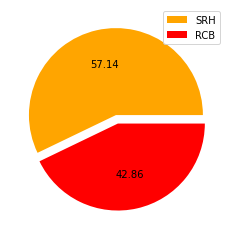

In [195]:
plt.pie(rcbh2hsrh['winner'].value_counts(),colors=['orange','red'],autopct='%.2f',explode=[0,0.1])
plt.legend(['SRH','RCB'])

In [196]:
rcbh2hsrh=matches[((matches['team1']=='Sunrisers Hyderabad')&(matches['team2']=='Royal Challengers Bangalore'))|((matches['team2']=='Sunrisers Hyderabad')&(matches['team1']=='Royal Challengers Bangalore'))]

In [197]:
rcbh2hsrh['toss_decision'].value_counts().iplot(kind='bar')

In [198]:
rcbh2hsrhmini=rcbh2hsrh[['winner','win_by_runs','win_by_wickets']]

In [199]:
rcbh2hsrhmini=rcbh2hsrhmini.set_index('winner')

In [200]:
rcbh2hsrhmini.iplot(kind='bar')

#Season Wise Match Summary

In [201]:
matches.head(1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


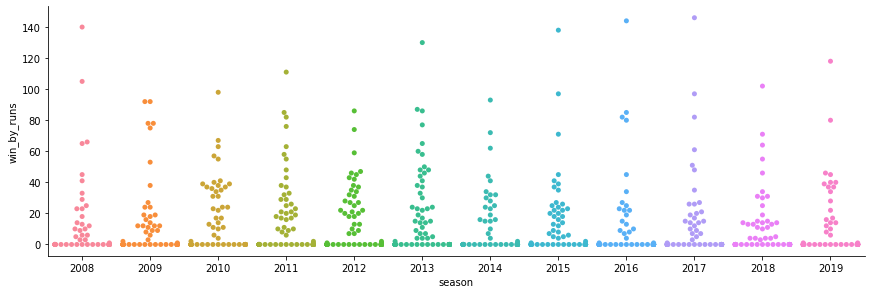

In [202]:
import warnings
warnings.filterwarnings("ignore")
sns.catplot(x='season',y='win_by_runs',data=matches,kind='swarm',height=4,aspect=3)

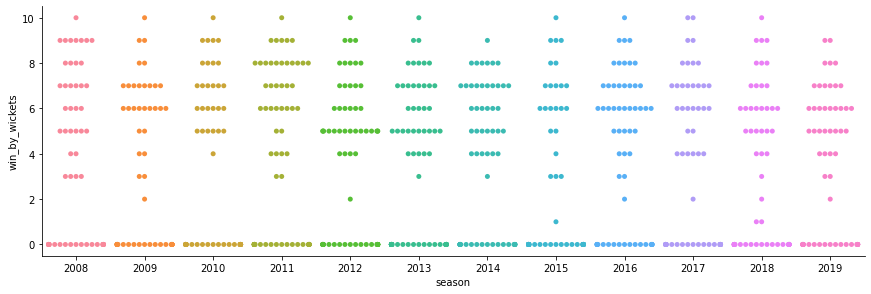

In [203]:
sns.catplot(x='season',y='win_by_wickets',data=matches,kind='swarm',height=4,aspect=3)

In [204]:
season_max_winnings=matches.groupby('season')[['win_by_runs','win_by_wickets']].max()

In [205]:
season_max_winnings['win_by_runs'].iplot(kind='bar')

In [206]:
season_max_winnings['win_by_wickets'].iplot(kind='bar')

#Ball by Ball winnings

In [207]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [208]:
deliveries['batsman'].value_counts().head(15).iplot(kind='bar')

In [209]:
deliveries['bowler'].value_counts().head(15).iplot(kind='bar')

In [210]:
deliveries['non_striker'].value_counts().head(15).iplot(kind='bar')

In [211]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [212]:
deliveries.groupby('match_id')[['total_runs']].sum().sort_values(['total_runs'],ascending=False)

,total_runs
match_id,
7937,471
206,469
50,453
61,447
11338,445
...,...
471,141
35,135
99,135


In [213]:
print(deliveries[deliveries['match_id']==7937].groupby('inning')['total_runs'].sum())

inning
1    250
2    221
Name: total_runs, dtype: int64


In [214]:
matches[matches.index==7937]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
7937,2018,Indore,2018-12-05,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,31,0,SP Narine,Holkar Cricket Stadium,O Nandan,Virender Kumar Sharma,Bruce Oxenford


In [216]:
deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(15).iplot(kind='bar')

In [218]:
deliveries['player_dismissed'].value_counts().head(15).iplot(kind='bar',title='max player dismissals')

In [137]:
deliveries['dismissal_kind'].value_counts().iplot(kind='bar')

In [220]:
vkohli=deliveries[deliveries['batsman']=='V Kohli']

In [221]:
vkohli['dismissal_kind'].value_counts().iplot(kind='bar',title='vkohli dismissals')

In [222]:
vkohli['dismissal_kind']=vkohli['dismissal_kind'].astype(str)

In [223]:
vkohli['dismissal_kind']=vkohli['dismissal_kind'].replace('Nan',np.nan)

In [224]:
vkohli_dismissed_mask=vkohli['dismissal_kind']!='nan'

In [225]:
vkohli[vkohli_dismissed_mask]['bowler'].value_counts().head(15).iplot(kind='bar',title='Virat Kohli most dismissals against bowler')

In [226]:
sraina=deliveries[deliveries['batsman']=='SK Raina']

In [227]:
sraina['dismissal_kind'].value_counts().iplot(kind='bar',title='sraina dismissals')

In [228]:
sraina['dismissal_kind']=sraina['dismissal_kind'].astype(str)

In [229]:
sraina['dismissal_kind']=sraina['dismissal_kind'].replace('Nan',np.nan)

In [230]:
sraina_dismissed_mask=sraina['dismissal_kind']!='nan'

In [231]:
sraina[sraina_dismissed_mask]['bowler'].value_counts().head(15).iplot(kind='bar',title='Suresh Raina most dismissals against bowler')

In [151]:
sraina.groupby('bowler')['batsman_runs'].sum().sort_values(ascending=False).head(15).iplot(kind='bar',title='most runs against a bowler')

In [232]:
deliveries.tail(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [233]:
deliveries['out']=0

In [234]:
deliveries['player_dismissed']=deliveries['player_dismissed'].astype(str)

In [235]:
outdeliveriesmask=deliveries['player_dismissed']!='nan'

In [236]:
for index,row in deliveries.iterrows():
  if row['player_dismissed']!='nan':
    deliveries.loc[index,'out']=1

In [237]:
deliveries[outdeliveriesmask]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,out
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh,1
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,0,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby,1
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby,1
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN,1
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179019,11415,2,Chennai Super Kings,Mumbai Indians,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,0,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock,1
179033,11415,2,Chennai Super Kings,Mumbai Indians,13,5,SR Watson,MS Dhoni,HH Pandya,0,0,0,0,0,0,1,0,1,MS Dhoni,run out,Ishan Kishan,1
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,0,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock,1
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,1


In [238]:
deliveries[outdeliveriesmask].groupby('bowler')['out'].sum().sort_values(ascending=False).head(15).iplot(kind='bar',title='IPL Leading wicket takers')

In [159]:
deliveries[deliveries['bowler']=='RP Singh']['out'].value_counts()

0    1774
1     100
Name: out, dtype: int64

#Most marketable teams
1)MI</BR>
2)CSK</BR>
3)KKR</BR>
4)SRH</BR>
5)RCB</BR>

#Most Marketable Players
1)Chris Gayle</br>
2)AB De Villiers    { due to MOM}</br>
3)Virat Kohli </br>
4)SK Raina {due to runs scored}</br>
5)Malinga </br>
6)Dj Bravo {most wickets}</br>